# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import warnings
warnings.filterwarnings('ignore')

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
     
    # Create endpoint URL with each city
    #city_url = city_url = url+"&q="+city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | villa de soto
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | tympaki
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | reggane
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | northam
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | kashkhatau
Processing Record 17 of Set 1 | poykovskiy
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | gagnoa
Processing Record 20 of Set 1 | altay
Processing Record 21 of Set 1 | rio grande
Processing Record 22 of Set 1 | iqal

Processing Record 42 of Set 4 | olonkinbyen
Processing Record 43 of Set 4 | fort bragg
Processing Record 44 of Set 4 | queenstown
Processing Record 45 of Set 4 | sao martinho
Processing Record 46 of Set 4 | itoman
Processing Record 47 of Set 4 | shenjiamen
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | tokar
Processing Record 0 of Set 5 | howard springs
Processing Record 1 of Set 5 | angaur state
Processing Record 2 of Set 5 | taghazout
Processing Record 3 of Set 5 | pandan
Processing Record 4 of Set 5 | severobaykal'sk
Processing Record 5 of Set 5 | kayangel
Processing Record 6 of Set 5 | crane
Processing Record 7 of Set 5 | pacasmayo
Processing Record 8 of Set 5 | christchurch
Processing Record 9 of Set 5 | corner brook
Processing Record 10 of Set 5 | cannonvale
Processing Record 11 of Set 5 | peto
Processing Record 12 of Set 5 | karliova
Processing Record 13 of Set 5 | punta arenas
Processing Record 14 of Set 5 | mount isa
Processing Record 15 of S

Processing Record 38 of Set 8 | stepnoye
Processing Record 39 of Set 8 | katsuura
Processing Record 40 of Set 8 | hailey
Processing Record 41 of Set 8 | kasamwa
Processing Record 42 of Set 8 | villa union
Processing Record 43 of Set 8 | buka
Processing Record 44 of Set 8 | waspan
Processing Record 45 of Set 8 | mingshui
Processing Record 46 of Set 8 | korsakov
Processing Record 47 of Set 8 | ettlingen
Processing Record 48 of Set 8 | pathein
Processing Record 49 of Set 8 | la toma
Processing Record 0 of Set 9 | alo
Processing Record 1 of Set 9 | idri
Processing Record 2 of Set 9 | antofagasta
Processing Record 3 of Set 9 | zrenjanin
Processing Record 4 of Set 9 | kariba
Processing Record 5 of Set 9 | zeya
Processing Record 6 of Set 9 | konarka
Processing Record 7 of Set 9 | saint-pie
Processing Record 8 of Set 9 | argo
Processing Record 9 of Set 9 | gribanovskiy
Processing Record 10 of Set 9 | nabire
Processing Record 11 of Set 9 | mata-utu
Processing Record 12 of Set 9 | abou el hassan

Processing Record 25 of Set 12 | butembo
Processing Record 26 of Set 12 | port lincoln
Processing Record 27 of Set 12 | maisi
Processing Record 28 of Set 12 | sadjoavato
City not found. Skipping...
Processing Record 29 of Set 12 | nova vicosa
Processing Record 30 of Set 12 | coari
Processing Record 31 of Set 12 | pacific grove
Processing Record 32 of Set 12 | tanjung pandan
Processing Record 33 of Set 12 | santa terezinha
Processing Record 34 of Set 12 | magong
Processing Record 35 of Set 12 | noosa heads
Processing Record 36 of Set 12 | santa elena de uairen
Processing Record 37 of Set 12 | kulia village
City not found. Skipping...
Processing Record 38 of Set 12 | ostersund
Processing Record 39 of Set 12 | demre
Processing Record 40 of Set 12 | paris
Processing Record 41 of Set 12 | kyzylorda
Processing Record 42 of Set 12 | kyzyl
Processing Record 43 of Set 12 | inarajan village
Processing Record 44 of Set 12 | dibba al-hisn
Processing Record 45 of Set 12 | kirakira
Processing Record

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.20,58,56,7.50,TF,1688921478
1,villa de soto,-30.8552,-64.9995,20.22,78,100,2.03,AR,1688921478
2,codrington,-38.2667,141.9667,10.65,93,100,4.99,AU,1688921479
3,keflavik,64.0049,-22.5624,15.24,58,0,7.20,IS,1688921479
4,tympaki,35.0729,24.7685,26.98,53,0,4.45,GR,1688921479


In [11]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.20,58,56,7.50,TF,1688921478
1,villa de soto,-30.8552,-64.9995,20.22,78,100,2.03,AR,1688921478
2,codrington,-38.2667,141.9667,10.65,93,100,4.99,AU,1688921479
3,keflavik,64.0049,-22.5624,15.24,58,0,7.20,IS,1688921479
4,tympaki,35.0729,24.7685,26.98,53,0,4.45,GR,1688921479


In [14]:
# Convert Unix/UTC Date to US Eastern Time Zone
city_data_df['Date']= pd.to_datetime(city_data_df['Date'], unit='s', utc=True).dt.tz_convert('US/Eastern')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.20,58,56,7.50,TF,2023-07-09 12:51:18-04:00
1,villa de soto,-30.8552,-64.9995,20.22,78,100,2.03,AR,2023-07-09 12:51:18-04:00
2,codrington,-38.2667,141.9667,10.65,93,100,4.99,AU,2023-07-09 12:51:19-04:00
3,keflavik,64.0049,-22.5624,15.24,58,0,7.20,IS,2023-07-09 12:51:19-04:00
4,tympaki,35.0729,24.7685,26.98,53,0,4.45,GR,2023-07-09 12:51:19-04:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

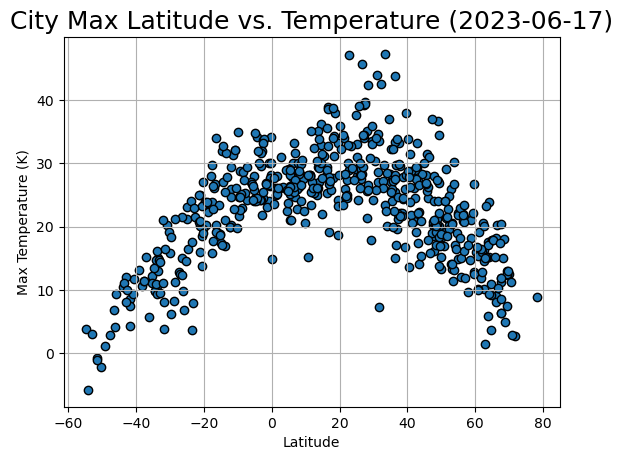

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-06-17)", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid()

plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

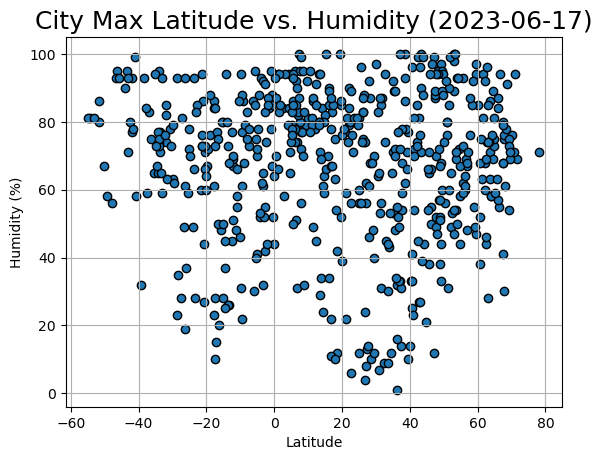

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-06-17)", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

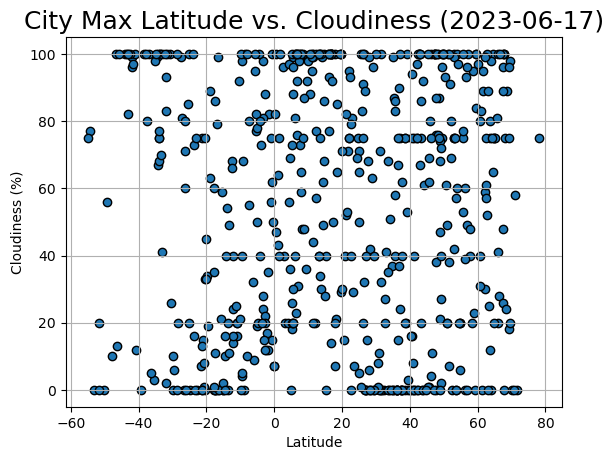

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-06-17)", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

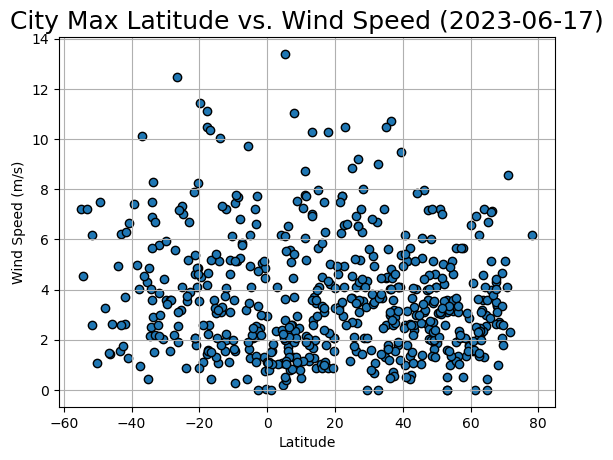

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-06-17)", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
m, b = np.polyfit(city_data_df["Lat"],city_data_df["Max Temp"], 1) 
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print(line_eq)

y = 0.02x + 22.4


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,keflavik,64.0049,-22.5624,15.24,58,0,7.20,IS,2023-07-09 12:51:19-04:00
4,tympaki,35.0729,24.7685,26.98,53,0,4.45,GR,2023-07-09 12:51:19-04:00
6,reggane,26.7158,0.1714,45.58,4,0,6.54,DZ,2023-07-09 12:51:19-04:00
8,ust-nera,64.5667,143.2000,3.74,89,65,2.55,RU,2023-07-09 12:51:19-04:00
10,northam,51.0333,-4.2167,19.23,76,49,7.22,GB,2023-07-09 12:51:19-04:00


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.20,58,56,7.50,TF,2023-07-09 12:51:18-04:00
1,villa de soto,-30.8552,-64.9995,20.22,78,100,2.03,AR,2023-07-09 12:51:18-04:00
2,codrington,-38.2667,141.9667,10.65,93,100,4.99,AU,2023-07-09 12:51:19-04:00
5,ancud,-41.8697,-73.8203,8.58,77,96,3.72,CL,2023-07-09 12:47:41-04:00
7,adamstown,-25.0660,-130.1015,21.25,72,100,7.32,PN,2023-07-09 12:51:19-04:00


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.6097346849046972


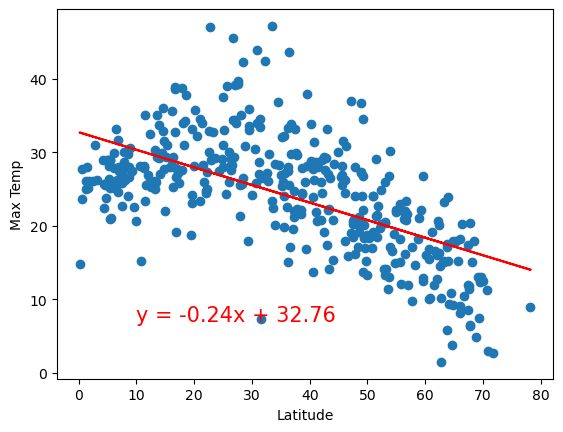

In [22]:
# Linear regression on Northern Hemisphere
# Determine r value
correlation = northern_hemi_df.corr()
print("The r-value is: ", correlation.loc['Max Temp', 'Lat'])

#Linear regression construction
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,7),fontsize=15,color="red")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.show()

The r-value is:  0.8632357128238857


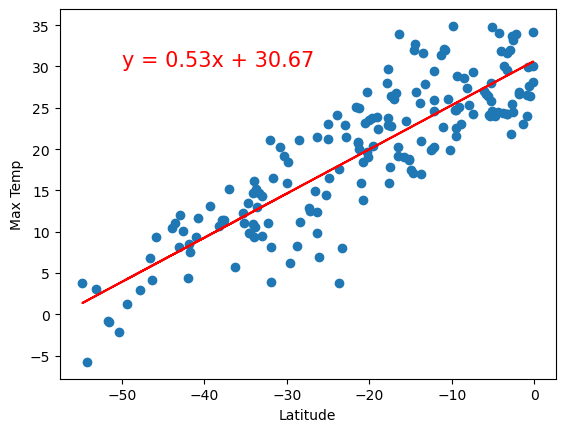

In [23]:
# Linear regression on Southern Hemisphere
# Determine r value
correlation = southern_hemi_df.corr()
print("The r-value is: ", correlation.loc['Max Temp', 'Lat'])

#Linear regression construction
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.show()

**Discussion about the linear relationship:** 

The strongest correlation among all of our models is that between temperature and latitude. For the Northern Hemisphere, we have an r-value of  -0.6097, which shows an inverse relationship.  In other words, as the latitude increases, we see the temperature decrease.  For the Southern Hemisphere we also see a strong correlation, but one that is positive—with an r-value of 0.8632.  So, here, it is the case that as latitude increases (from -50 to 0 on our plot), the temperature also increases.  This is a direct relationship, unlike that of the inverse relationship shown by our Northern Hemisphere data.  This as well can be seen by the respective slopes in the linear equations that describe the regressions.  Recall, our equation of the line being y = mx + b, where slope is rate of change.  If the m value is negative, there is an inverse relationship.  If m is a positive value, there is a direct relationship. Note for the Northern hemisphere, we have a slope of -0.24 (indicating an inverse relationship).  Whereas, for the Southern Hemisphere, we have a slope of 0.53, indicating a direct relationship.  Interestingly, we know that the hottest temperatures of the planet lie at the equator (latitude = 0).  This is where the Sun’s rays are the most direct.  And the further from the equator, the less direct the sun’s rays, and thus we find lower temperatures.

The correlation between temperature and latitude is illustrated further by the clustering of our data plots.  The clustering has some definition, and lends its shape toward the linear trend of each hemisphere’s model.


### Humidity vs. Latitude Linear Regression Plot

The r-value is:  -0.06333619726392047


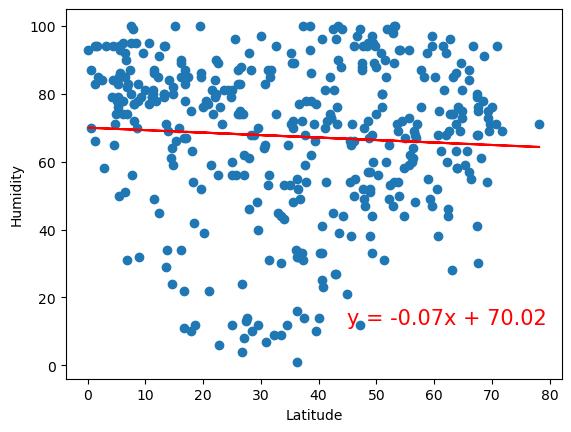

In [24]:
# Northern Hemisphere
# Determine r value
correlation = northern_hemi_df.corr()
print("The r-value is: ", correlation.loc['Humidity', 'Lat'])

#Linear regression construction
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,12),fontsize=15,color="red")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.show()

The r-value is:  -0.1885535685184745


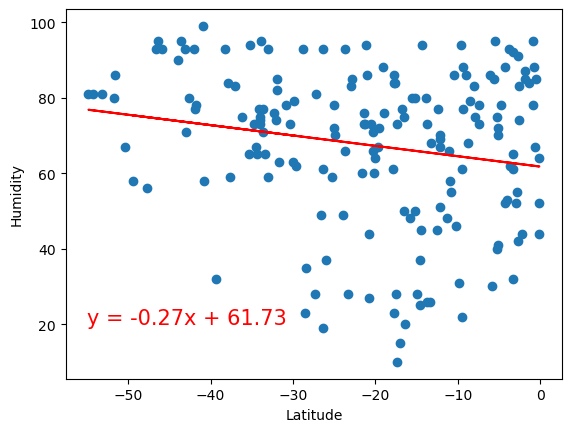

In [25]:
# Southern Hemisphere
# Determine r value
correlation = southern_hemi_df.corr()
print("The r-value is: ", correlation.loc['Humidity', 'Lat'])

#Linear regression construction
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.show()

**Discussion about the linear relationship:**

Here, our data shows a weak correlation between humidity and latitude.  Both have very low Pearson’s r scores (r = -0.0633 for the Northern Hemisphere, and r = -0.1886 for the Southern).  In fact, one might say there is practically no correlation, especially for that of the Northern Hemisphere. For both hemispheres, the slope of the linear equation for the regression line is also very small, indicating very little change in humidity across latitude.  This can be see by the “almost” horizontal juxtaposition of the regression line.  This is most dramatically portrayed for the Northern Hemisphere, where the humidity hovers around 70, no matter how the latitude changes.  For the Southern Hemisphere, the humidity lies between 60 and 80, decreasing ever so slightly as the latitude approaches the equator.  Recall, the Sun’s rays are strongest at the equator, which aligns with dryer weather (i.e. less humidity).  But even with this truth in mind, the correlation remains weak. And yet, the North pole is often known as one of the driest places on Earth.  It receives very little rainfall, mostly in the form of snow – which is quickly absorbed by the arid environment, leaving very little moisture.

The low correlation between humidity and latitude is also evidenced by the lack of clustering of our data plots.  There is seemingly no definition nor shape, thus no clear strong trend one way or another.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  -0.07713782992313509


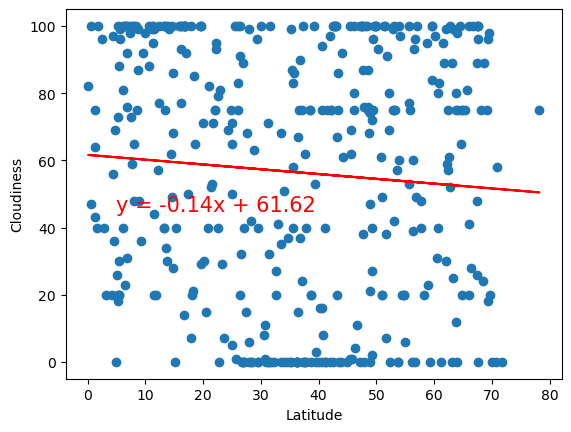

In [26]:
# Northern Hemisphere
# Determine r value
correlation = northern_hemi_df.corr()
print("The r-value is: ", correlation.loc['Cloudiness', 'Lat'])

#Linear regression construction
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.show()

The r-value is:  -0.1991033766368948


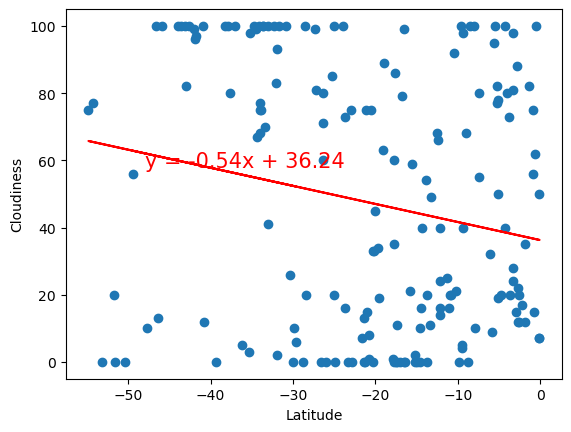

In [27]:
# Southern Hemisphere
# Determine r value
correlation = southern_hemi_df.corr()
print("The r-value is: ", correlation.loc['Cloudiness', 'Lat'])

#Linear regression construction
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-48,58),fontsize=15,color="red")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.show()

**Discussion about the linear relationship:**

Our data shows a weak correlation between cloudiness and latitude for both the Northern and Southern hemispheres, with Pearson’s r values of -0.0771 and -0.1991 respectively.  The cloud-cover of the Northern Hemisphere hovers around 60 across latitude. The Southern Hemisphere shows a little more variation (consistent with a slightly larger r value), with cloud-cover ranging between 40 and 70. The relationship for both hemispheres is an inverse one, in that as latitude increases, cloudiness ever so slightly decreases.  This is further illustrated by the negative value of the slopes in each hemisphere’s regression line equation.  As well, the lack of cluster of our data plots also indicates the weak relationship.  Both hemispheres show a speckling of ‘data dots’ across the visual grid, clearly indicating a lack of trend between the two dimensions plotted.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  -0.02009854488193473


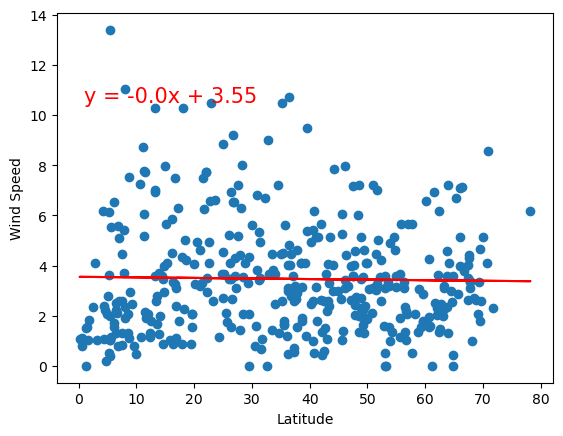

In [28]:
# Northern Hemisphere
# Determine r value
correlation = northern_hemi_df.corr()
print("The r-value is: ", correlation.loc['Wind Speed', 'Lat'])

#Linear regression construction
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1,10.5),fontsize=15,color="red")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.show()

The r-value is:  -0.24891887936555304


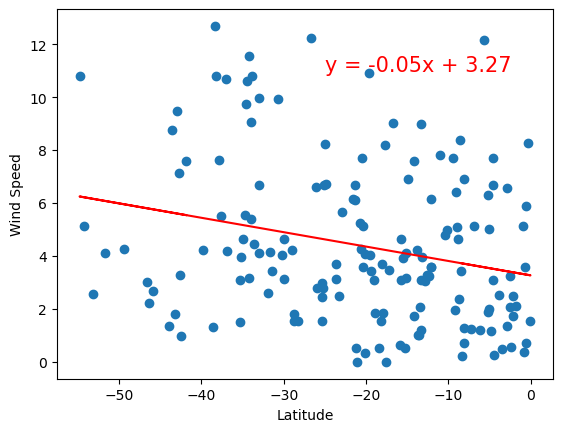

In [26]:
# Southern Hemisphere
# Determine r value
correlation = southern_hemi_df.corr()
print("The r-value is: ", correlation.loc['Wind Speed', 'Lat'])

#txt="Discussion about the linear relationship:", weight='bold'

#Linear regression construction
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,11),fontsize=15,color="red")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.show()

**Discussion about the linear relationship:**

Interestingly, we have a slope of nearly 0 in the linear equation of our regression line, and our graph reflects this with what looks like a perfectly horizonal trend line.  In other words, wind speed does not appear to change across latitude. Note, our calculation would have benefited from specifying more decimal places in the formatting, thus giving us a slightly more accurate answer.  Nonetheless, it clear that wind speed and latitude have roughly little-to-no correlation in the Northern Hemisphere, which is not say there isn’t wind – there is!  In fact, both poles are known to be extremely windy.  According to our data, on this day the winds remain even as latitude changes.  The Southern Hemisphere shows a weak correlation, with the slope of linear regression indicated by the slight tilt downward as latitude gets closer to the equator. As an aside (and yet very much relevant to the subject of our analysis), right at the equator, there is almost no wind.  This area is referred to as the ‘doldrums’ due to its static atmosphere.

Wind speed is indeed higher near the poles. The inverse trend of a higher wind speed at a lower latitude is seen in our data for the Southern Hemisphere.  Interestingly, the main reason the South Pole is so much colder than the North Pole is because the strength of its winds.  The strong winds stop the warmer air from mixing with the polar air.
